In [4]:
# Insert user id in 'user_id'
# Insert file name in 'file_path'

import os
import pandas as pd
import xml.etree.ElementTree as ET

main_dir = os.getcwd()
print(main_dir)

user_id = str(106)
user_dir = os.path.join(main_dir, 'raw_data_time', 'p' + user_id)
print(user_dir)

# Function to calculate first core_time, last core_time, and total_time for a given XML file
def process_xml_file(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    core_times = []
    x_values = []
    y_values = []
    durations = []  # New list to store the durations

    # Find all 'response' elements in the XML
    responses = root.findall('.//response')

    # Extract all core times, x, and y values
    for response in responses:
        core_time = int(response.get('core_time'))
        x = response.get('x')
        y = response.get('y')

        # Check for 'NaN' values in 'x' and 'y', and handle them
        try:
            x = int(x)
        except (ValueError, TypeError):
            x = None

        try:
            y = int(y)
        except (ValueError, TypeError):
            y = None

        core_times.append(core_time)
        x_values.append(x)
        y_values.append(y)

    # Calculate the durations
    for i in range(len(core_times) - 1):
        duration = core_times[i + 1] - core_times[i]
        durations.append(duration)

    # The last duration is set to None since there is no next core_time
    durations.append(None)

    # Get the file name without the extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    return {'PID': user_id, 'core_times': core_times, 'x': x_values, 'y': y_values, 'duration': durations}

# Enter the 'task number' of the user id that worked on 'high priority' task; for instance: p122-6
# File path
file_path = os.path.join(user_dir, 'p106-6.xml')

# Process the XML file
result = process_xml_file(file_path)

# Create a data frame from the result
df = pd.DataFrame(result)

# Print the data frame
print(df)

# Directory to save the generated CSV files
generated_eye_gaze_coordination_dir = os.path.join(main_dir, "generated_eye_gaze_coordination")

# Ensure the directory exists
os.makedirs(generated_eye_gaze_coordination_dir, exist_ok=True)

csv_file_path = os.path.join(generated_eye_gaze_coordination_dir, f'p{user_id}_eyegaze_xy.csv')

df.to_csv(csv_file_path, index=False)

print('file have been saved successfully!')

/Users/sarayabesi/Documents/research-poly/eye-tracker-project/data_extraction
/Users/sarayabesi/Documents/research-poly/eye-tracker-project/data_extraction/raw_data_time/p106
       PID     core_times      x      y  duration
0      106  1682440045616  304.0  370.0       8.0
1      106  1682440045624  303.0  368.0       6.0
2      106  1682440045630  301.0  371.0       8.0
3      106  1682440045638  300.0  375.0      11.0
4      106  1682440045649  299.0  373.0       8.0
...    ...            ...    ...    ...       ...
31573  106  1682440308721  275.0  368.0       8.0
31574  106  1682440308729  266.0  368.0       8.0
31575  106  1682440308737  276.0  375.0       7.0
31576  106  1682440308744  273.0  355.0       9.0
31577  106  1682440308753  287.0  358.0       NaN

[31578 rows x 5 columns]
file have been saved successfully!


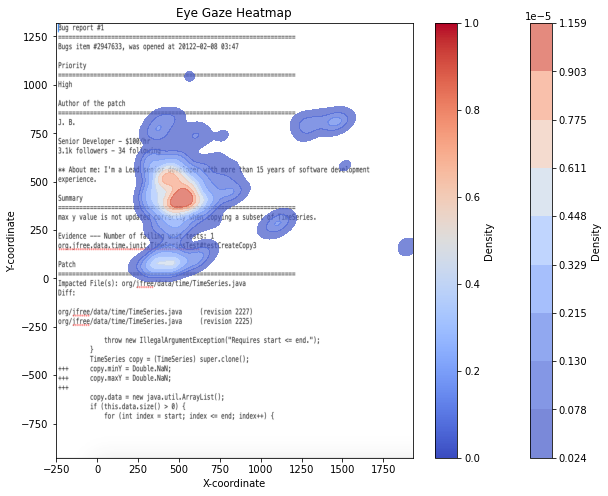

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace 'path/to/screenshot.png' with the actual file path of your screenshot
# insert a screnshot of a patch that the user id worked on it on a specifix task; for instance here: user id number
# 106, on his 6th task, worked on bug1, task 1.
screenshot_path = main_dir + '/bug1-1.png'
# screenshot_path = '/Users/sarayabesi/Documents/research-poly/trust-code/bug1.png'
screenshot_img = plt.imread(screenshot_path)

# Sample eye_data, replace this with your actual DataFrame
eye_data = df
x_values = eye_data['x']
y_values = eye_data['y']

# Create a colormap to use for the heatmap, you can adjust the cmap as per your preference
cmap = 'coolwarm'

plt.figure(figsize=(10, 8))

# Use sns.kdeplot to create the heatmap based on the eye gaze data (only 'x_values' and 'y_values')
sns.kdeplot(x=x_values, y=y_values, cmap=cmap, fill=True, alpha=0.7, cbar=True, cbar_kws={'label': 'Density'})

# Overlay the eye gaze data points using plt.scatter (optional, can be removed if not needed)
# If you want to keep this overlay, you can set 'alpha' to a higher value (e.g., 0.5) for better visibility
# plt.scatter(x=x_values, y=y_values, s=50, alpha=0.5, marker='o')

plt.imshow(screenshot_img, extent=[min(x_values), max(x_values), min(y_values), max(y_values)], aspect='auto', alpha=0.8)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Eye Gaze Heatmap')

# To show the correct colorbar, create a ScalarMappable object from the heatmap and use it to create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])  # Pass an empty array since we don't have any values to map to colors
cbar = plt.colorbar(sm)
cbar.set_label('Density')

plt.show()

# Save the heatmap as a PNG file, change 'heatmap_output.png' to your desired file name
#plt.savefig('heatmap_output113-2.png', dpi=300, bbox_inches='tight')
#plt.show()